# Netflix Dataset Analysis Project

## 1. Introduction
This project analyzes the Netflix dataset containing movies and TV shows available on the platform between 2008 and 2021.  
The aim is to study content trends (Movies vs. TV Shows, Genres, Countries, Ratings) and provide **strategic recommendations** for Netflix.

---


In [7]:
# 2. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")


## 3. Load Dataset
We first upload the dataset to Colab and load it using Pandas.


In [8]:
df = pd.read_csv('/content/Netflix Dataset.csv')
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## 4. Dataset Overview
Let's check the shape, column names, and missing values.


In [9]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (7789, 11)

Columns: Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


## 5. Data Cleaning
Steps:
- Convert `Release_Date` to datetime.
- Separate `Duration` into numeric value and type (Minutes/Seasons).
- Fix encoding issues in text columns.
- Extract main genre from `Type`.


In [10]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Separate duration
df['Duration_Numeric'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Duration_Type'] = df['Duration'].str.extract('([a-zA-Z]+)')

# Fix encoding in Title
df['Title'] = df['Title'].astype(str).str.encode('latin-1', 'ignore').str.decode('utf-8', 'ignore')

# Extract main genre
df['Main_Genre'] = df['Type'].str.split(',').str[0]

# Extract Year
df['Year'] = df['Release_Date'].dt.year


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2559762051.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_Numeric'] = df['Duration'].str.extract('(\d+)').astype(float)


## 6. Exploratory Data Analysis (EDA)
We now analyze:
1. Movies vs. TV Shows  
2. Content growth over the years  
3. Top contributing countries  
4. Most common genres  
5. Ratings distribution  


/tmp/ipython-input-583715560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Category", palette="Set2")


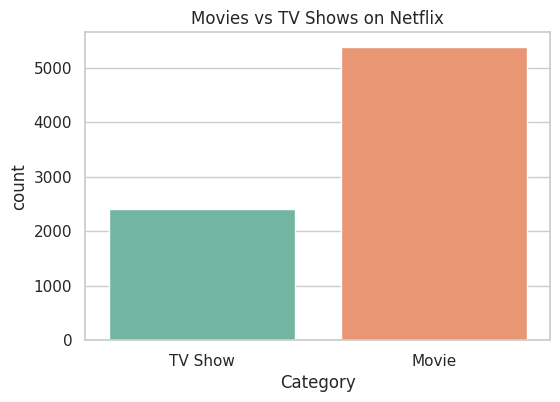

In [11]:
# 6.1 Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Category", palette="Set2")
plt.title("Movies vs TV Shows on Netflix")
plt.show()


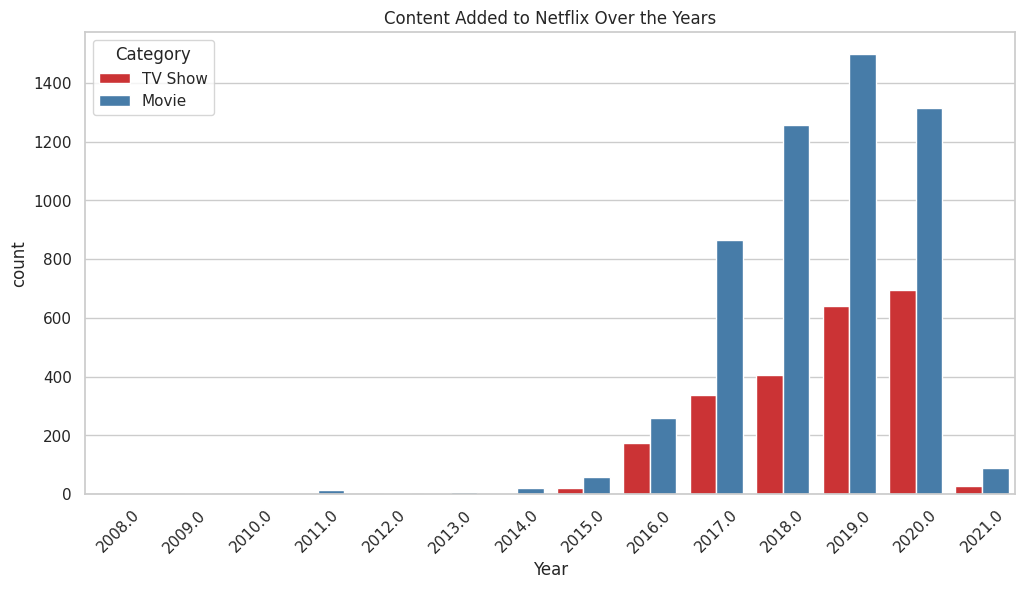

In [12]:
# 6.2 Content Growth Over the Years
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Year", hue="Category", palette="Set1")
plt.title("Content Added to Netflix Over the Years")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2262629740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="muted")


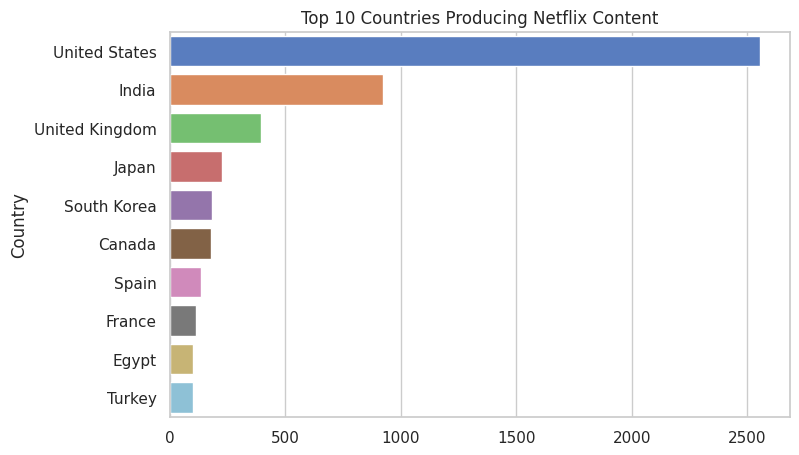

In [13]:
# 6.3 Top 10 Content Producing Countries
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="muted")
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()


/tmp/ipython-input-2071693736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="coolwarm")


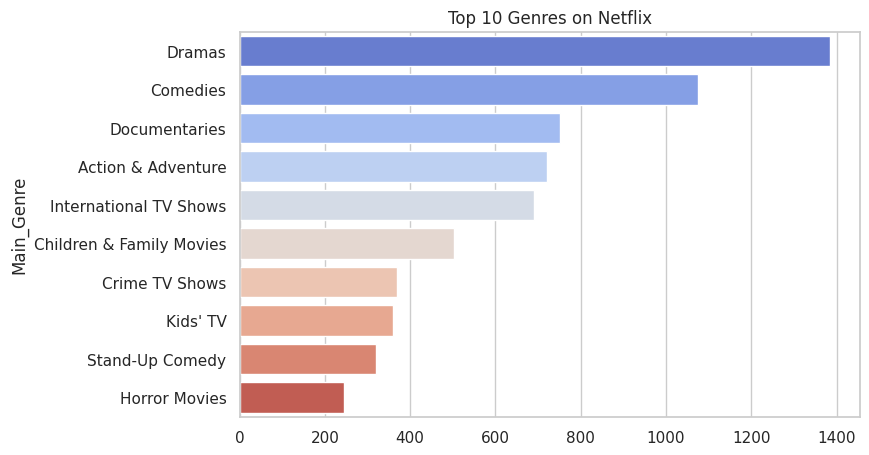

In [14]:
# 6.4 Top 10 Genres
top_genres = df['Main_Genre'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="coolwarm")
plt.title("Top 10 Genres on Netflix")
plt.show()


/tmp/ipython-input-4288940000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Rating", order=df['Rating'].value_counts().index, palette="pastel")


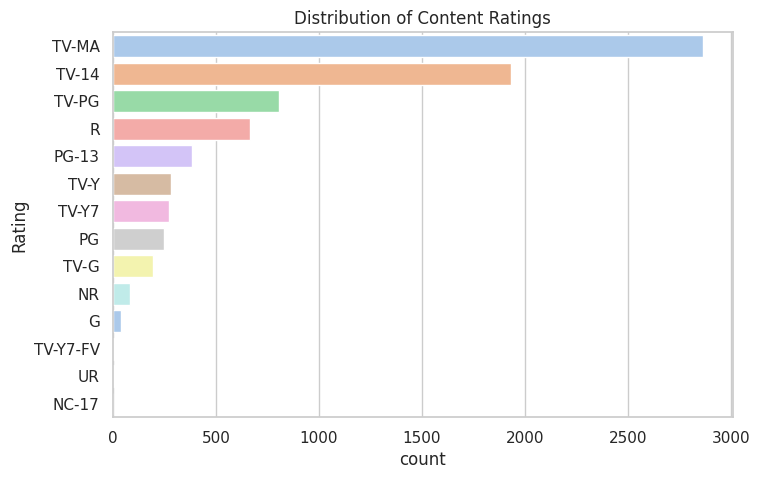

In [15]:
# 6.5 Ratings Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, y="Rating", order=df['Rating'].value_counts().index, palette="pastel")
plt.title("Distribution of Content Ratings")
plt.show()


## 7. Insights and Strategic Recommendations

- **Movies dominate** Netflix’s catalog, but **TV Shows have grown significantly after 2015**.  
- **Drama, Comedy, and International genres** are the most popular, suggesting global diversification.  
- **United States and India** are the top contributors, showing strong regional representation.  
- **Ratings like TV-MA and PG-13** dominate, reflecting a mix of mature and family-friendly content.  

### Recommendations:
1. Continue investing in **International TV Shows**, especially from India, Korea, and Turkey, since they are rising in global demand.  
2. Strengthen **original productions in Drama and Sci-Fi**, as these have consistent popularity.  
3. Expand into **underrepresented genres** (e.g., documentaries, regional cinema) to capture niche audiences.  
4. Maintain a balance between **family-friendly (PG-13)** and **mature content (TV-MA)** to cater to wider demographics.  


## 8. Conclusion
This project provided a detailed analysis of Netflix’s content catalog.  
The findings can help Netflix refine its **content acquisition and production strategy** to stay competitive in the global OTT industry.
